# PRÁTICA GUIADA: Introdução a Machine Learning 1

#### Agora, vamos analisar vários exemplos simples de aplicação de métodos de aprendizagem supervisionada e não supervisionada.

### Exemplo de aprendizagem supervisionada: Regressão linear simples

#### Como exemplo desse processo, vamos considerar uma regressão linear simples, ou seja, o caso comum de ajustar uma linha a dados com a forma $(x, y)$.

#### Vamos importar a classe de pacotes [`matplotlib.pyplot`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html) para plotar os valores que vamos criar com o auxílio da função [`np.random.RandomState()`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.RandomState.html), gerando um conjunto de dados para nosso exemplo de regressão:

#### [`.scatter()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter) para investigar a dispersão entre os pontos gerados.

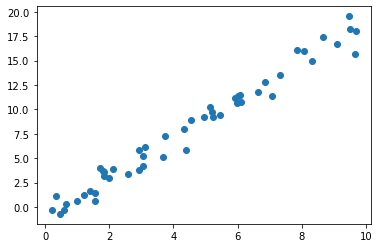

In [18]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)

# Traçamos
plt.scatter(x, y);

####  <span style = "color:red">Código Original.</span>
<!---
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)

# Traçamos
plt.scatter(x, y);
-->

#### Depois de gerar os dados, podemos usar a receita que estudamos antes. Vamos ver os passos do processo: 

### 1. Selecionar uma “classe de modelo”

- Em Scikit-Learn, cada [classe de modelo](https://scikit-learn.org/stable/tutorial/basic/tutorial.html) é representada com uma classe de Python. 

- Então, por exemplo, se queremos calcular um modelo de [regressão linear simples](https://en.wikipedia.org/wiki/Regression_analysis), podemos importar a classe de regressão linear desta forma:

- Vamos importar a classe de funções [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [19]:
from sklearn.linear_model import LinearRegression

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.linear_model import LinearRegression
-->

#### Lembre que também existem outros modelos de regressão linear mais gerais. Você pode ler mais sobre eles na documentação [`sklearn.linear_model`](http://Scikit-Learn.org/stable/modules/linear_model.html). Aqui escolheremos o modelo de [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

### 2. Escolher os hiperparâmetros do modelo

#### É importante destacar que *uma classe de modelo não é a mesma coisa que uma instância de modelo*.

#### Depois de definir a classe de modelo, ainda é preciso tomar algumas decisões. Dependendo da classe de modelo escolhida para trabalhar, poderíamos ter que responder a uma ou mais perguntas, por exemplo:

- Queremos ajustar também uma interceptação (intercept = True)?
- Queremos que o modelo esteja normalizado?
- Queremos adicionar features calculadas a partir do input para aumentar a flexibilidade do modelo?
- Que grau de "regularização" queremos usar no modelo?

#### Esses são exemplos das decisões importantes que devem ser tomadas **depois de selecionar a classe de modelo a usar**.

#### Freqüêntemente, essas escolhas são representadas como *hiperparâmetros*, ou parâmetros que devem ser definidos antes que o modelo seja ajustado aos dados. 

#### Em Scikit-Learn, os hiperparâmetros são escolhidos como argumentos na instanciação do modelo. Nas próximas aulas, vamos explorar como justificar quantitativamente a escolha de hiperparâmetros.  

#### Para o nosso exemplo de regressão linear, vamos criar um objeto que receberá o modelo que pretendemos criar com a função [``LinearRegression()``](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Observe a parametrização `fit_intercept = True`.

In [20]:
model = LinearRegression(fit_intercept = True)
print(model)

LinearRegression()


####  <span style = "color:red">Código Original.</span>
<!---
model = LinearRegression(fit_intercept = True)
print(model)
-->

#### **Atenção**: quando o modelo é instanciado, a única ação que acontece é o armazenamento dos valores de hiperparâmetros.

#### Especificamente, ainda não aplicamos o modelo a nenhum dado: a API de Scikit-Learn faz uma distinção muito clara entre a *escolha do modelo com hiperparâmetros* e a *aplicação do modelo aos dados*. 

### 3. Preparar os dados em uma matriz de `features` e um vetor `target`.

#### Já falamos da representação de dados de Scikit-Learn, que exige uma matriz de `features` de duas dimensões e um vetor `target` de uma dimensão.

#### Aqui, a variável `target` `y` já está no formato correto (um array de comprimento `n_samples`), mas precisamos processar os dados em `x` para transformá-los em uma matriz de tamanho `[n_samples, n_features]`.

#### Vamos criar um objeto `x` e checar suas dimensões com o atributo [`.ndim` ](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.ndim.html).

In [21]:
x
x.ndim

1

####  <span style = "color:red">Código Original.</span>
<!---
x
x.ndim
-->

#### Nesse caso, isso se reduz a uma simples mudança de forma ([reshaping](https://towardsdatascience.com/reshaping-numpy-arrays-in-python-a-step-by-step-pictorial-tutorial-aed5f471cf0b)) do array de uma dimensão. Para isso podemos usar a função [`np.newaxis()`](https://numpy.org/doc/stable/reference/constants.html#numpy.newaxis) reindexar o objeto e atribuí-lo a `X`. 

#### Uma outra forma de alterar o formato do seu arranjo pode ser feito com a aplicação do método [`.reshape(-1,1)()`](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html).

In [33]:
X = x[:, np.newaxis]
X.shape

# Outra forma de fazer isso
X = x.reshape(-1,1)

####  <span style = "color:red">Código Original.</span>
<!---
X = x[:, np.newaxis]
X.shape

# Outra forma de fazer isso
X = x.reshape(-1,1)
-->

#### Testando novamente o número de dimensões, agora do objeto `X`, temos: 

In [34]:
X
X.ndim

2

In [35]:
X

array([[3.74540119],
       [9.50714306],
       [7.31993942],
       [5.98658484],
       [1.5601864 ],
       [1.5599452 ],
       [0.58083612],
       [8.66176146],
       [6.01115012],
       [7.08072578],
       [0.20584494],
       [9.69909852],
       [8.32442641],
       [2.12339111],
       [1.81824967],
       [1.8340451 ],
       [3.04242243],
       [5.24756432],
       [4.31945019],
       [2.9122914 ],
       [6.11852895],
       [1.39493861],
       [2.92144649],
       [3.66361843],
       [4.56069984],
       [7.85175961],
       [1.99673782],
       [5.14234438],
       [5.92414569],
       [0.46450413],
       [6.07544852],
       [1.70524124],
       [0.65051593],
       [9.48885537],
       [9.65632033],
       [8.08397348],
       [3.04613769],
       [0.97672114],
       [6.84233027],
       [4.40152494],
       [1.22038235],
       [4.9517691 ],
       [0.34388521],
       [9.09320402],
       [2.58779982],
       [6.62522284],
       [3.11711076],
       [5.200

####  <span style = "color:red">Código Original.</span>
<!---
X
X.ndim
-->

### 4. Ajustar o modelo aos dados

#### Agora, é hora de aplicar o modelo aos dados. Vamos fazer o ajuste dos dados ao modelo com o método [`.fit()`](https://scikit-learn.org/stable/tutorial/basic/tutorial.html) da instância de modelo.

In [36]:
model.fit(X, y)

LinearRegression()

####  <span style = "color:red">Código Original.</span>
<!---
model.fit(X, y)
-->

#### O método [`.fit()`](https://scikit-learn.org/stable/tutorial/basic/tutorial.html) faz uma sequência de cálculos internos que dependem do modelo, e os resultados dessas operações são armazenados em atributos específicos da classe de modelo que o usuário poderá explorar.

#### Em Scikit-learn, por convenção, todos os atributos que representam os parâmetros dos modelos que foram aprendidos durante o processo de treinamento com `fit()` têm `sublinhados` nos nomes; por exemplo, neste modelo linear, podemos observar os parâmetros [`coef_`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) e [`intercept_`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html):

In [37]:
a = model.intercept_
b = model.coef_
print(a)
print(b)

-0.9033107255311164
[1.9776566]


####  <span style = "color:red">Código Original.</span>
<!---
a = model.intercept_
b = model.coef_
print(a)
print(b)
-->

#### Aqui os atributos `coef_` e `intercept_` representam os coeficientes linear (a) angular (b), respectivamente.

#### Esses dois parâmetros representam a pendente e a interceptação do ajuste linear simples aos dados. Fazendo uma comparação com a definição do conjunto de dados sintético criado no início do exemplo, podemos ver que eles estão muito próximos da pendente `2` e da interceptação `-1`, definidas na fórmula para gerar os dados.

#### Uma pergunta que surge com frequência tem a ver com a incerteza (uncertainty) nesses parâmetros internos do modelo. 

#### Em geral, Scikit-Learn não oferece ferramentas para tirar conclusões sobre o estado interno dos modelos: interpretar os parâmetros de um modelo tem muito mais a ver com *modelagem estatística* que com *machine learning*.

#### Machine learning, por sua vez, enfoca a qualidade com a qual o modelo *faz previsões*.

#### Se quiser investigar o significado dos parâmetros de ajuste dentro do modelo, existem outras ferramentas, incluindo o pacote de python [Statsmodels](http://statsmodels.sourceforge.net/).

### 5. Prever tags para dados desconhecidos:

#### Depois que o modelo é treinado, a principal tarefa na aprendizagem supervisionada é fazer uma avaliação com base no que o modelo diz sobre os novos dados que não fizeram parte do **conjunto de treinamento**. 

#### A função [`.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html#numpy.linspace) retorna um intervalo específico com valores igualmente espaçados. Assim como antes, precisamos manipular os valores `x` em uma matriz de features de tamanho `[n_samples, m_features]`. Só depois desse passo será possível utilizá-la como argumento para a previsão. 

#### Vamos então instanciar um objeto que irá receber o resultado de [`.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html#numpy.linspace).

In [38]:
xfit = np.linspace(-1, 11)
xfit

array([-1.        , -0.75510204, -0.51020408, -0.26530612, -0.02040816,
        0.2244898 ,  0.46938776,  0.71428571,  0.95918367,  1.20408163,
        1.44897959,  1.69387755,  1.93877551,  2.18367347,  2.42857143,
        2.67346939,  2.91836735,  3.16326531,  3.40816327,  3.65306122,
        3.89795918,  4.14285714,  4.3877551 ,  4.63265306,  4.87755102,
        5.12244898,  5.36734694,  5.6122449 ,  5.85714286,  6.10204082,
        6.34693878,  6.59183673,  6.83673469,  7.08163265,  7.32653061,
        7.57142857,  7.81632653,  8.06122449,  8.30612245,  8.55102041,
        8.79591837,  9.04081633,  9.28571429,  9.53061224,  9.7755102 ,
       10.02040816, 10.26530612, 10.51020408, 10.75510204, 11.        ])

####  <span style = "color:red">Código Original.</span>
<!---
xfit = np.linspace(-1, 11)
xfit
-->

#### Aplique novamente a função [`np.newaxis()`](https://numpy.org/doc/stable/reference/constants.html#numpy.newaxis) para reindexar o objeto criado na célula anterior.

#### Usando o método [`.predict()`](https://scipy-lectures.org/packages/scikit-learn/index.html#:~:text=predict()%20%3A%20given%20a%20trained,each%20object%20in%20the%20array.) vamos analisar as previsões dos rótulos de saída, gerados pelo meodelo . No contexto deste exemplo, o “novo conjunto de dados” será um vetor de valores `x` , e observaremos os valores `y` previstos pelo modelo.

In [39]:
Xfit = xfit[:, np.newaxis]
Xfit

array([[-1.        ],
       [-0.75510204],
       [-0.51020408],
       [-0.26530612],
       [-0.02040816],
       [ 0.2244898 ],
       [ 0.46938776],
       [ 0.71428571],
       [ 0.95918367],
       [ 1.20408163],
       [ 1.44897959],
       [ 1.69387755],
       [ 1.93877551],
       [ 2.18367347],
       [ 2.42857143],
       [ 2.67346939],
       [ 2.91836735],
       [ 3.16326531],
       [ 3.40816327],
       [ 3.65306122],
       [ 3.89795918],
       [ 4.14285714],
       [ 4.3877551 ],
       [ 4.63265306],
       [ 4.87755102],
       [ 5.12244898],
       [ 5.36734694],
       [ 5.6122449 ],
       [ 5.85714286],
       [ 6.10204082],
       [ 6.34693878],
       [ 6.59183673],
       [ 6.83673469],
       [ 7.08163265],
       [ 7.32653061],
       [ 7.57142857],
       [ 7.81632653],
       [ 8.06122449],
       [ 8.30612245],
       [ 8.55102041],
       [ 8.79591837],
       [ 9.04081633],
       [ 9.28571429],
       [ 9.53061224],
       [ 9.7755102 ],
       [10

In [40]:
yfit = model.predict(Xfit)
yfit

array([-2.88096733, -2.39664326, -1.9123192 , -1.42799513, -0.94367106,
       -0.459347  ,  0.02497707,  0.50930113,  0.9936252 ,  1.47794926,
        1.96227333,  2.44659739,  2.93092146,  3.41524552,  3.89956959,
        4.38389366,  4.86821772,  5.35254179,  5.83686585,  6.32118992,
        6.80551398,  7.28983805,  7.77416211,  8.25848618,  8.74281024,
        9.22713431,  9.71145837, 10.19578244, 10.68010651, 11.16443057,
       11.64875464, 12.1330787 , 12.61740277, 13.10172683, 13.5860509 ,
       14.07037496, 14.55469903, 15.03902309, 15.52334716, 16.00767122,
       16.49199529, 16.97631936, 17.46064342, 17.94496749, 18.42929155,
       18.91361562, 19.39793968, 19.88226375, 20.36658781, 20.85091188])

####  <span style = "color:red">Código Original.</span>
<!---
Xfit = xfit[:, np.newaxis]
Xfit
yfit = model.predict(Xfit)
yfit
-->


#### Por último, para visualizar os resultados, vamos traçar primeiro os dados originais e, em seguida, o ajuste do modelo linear, com as funções [`plt.scatter`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) e [`plt.plot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html).

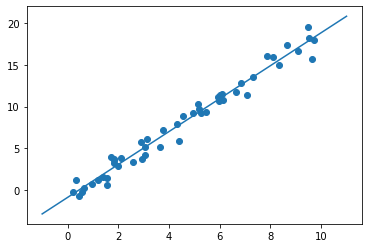

In [41]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

####  <span style = "color:red">Código Original.</span>
<!---
plt.scatter(x, y)
plt.plot(xfit, yfit);
-->

#### Normalmente, a eficácia do modelo é avaliada por meio da comparação dos resultados com algum baseline conhecido, como veremos no próximo exemplo.

### Exemplo de aprendizagem supervisionada: Classificação com o conjunto de dados Iris.

#### Vamos ver mais um exemplo desse processo, usando o conjunto de dados `Iris` que mencionamos antes. A pergunta será esta: usando um modelo treinado em uma parte do conjunto de dados Iris, com que eficácia será possível prever as `tags`  restantes?

#### Vamos primeiramente importar a biblioteca [`seaborn`](https://seaborn.pydata.org/) e carregar o dataset `iris` com a função [`sns.load_dataset()`](https://seaborn.pydata.org/generated/seaborn.load_dataset.html)

In [43]:
import seaborn as sns
iris = sns.load_dataset('iris')

####  <span style = "color:red">Código Original.</span>
<!---
import seaborn as sns
iris = sns.load_dataset('iris')
-->

#### Primeiramente examine as primeiras linhas do código, depois crie um novo dataframe `X_iris` sem a coluna `'species'`, assim poderemos treinar nosso modelos. Cheque o formato e novamente as primeiras linhas do novo dataframe. 

In [44]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [45]:
iris.shape

(150, 5)

In [51]:
X_iris = iris.drop('species', axis = 1)

In [52]:
X_iris.shape

(150, 4)

In [53]:
X_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


####  <span style = "color:red">Código Original.</span>
<!---
iris.head()
iris.shape
#X_iris = iris.drop('species', axis = 1)
#X_iris.shape
#X_iris.head()
-->

#### Crie também um objeto `y_iris`  que receba os rótulos do dataframe iris, a coluna `'species'`. 

In [54]:
y_iris = iris['species']

In [55]:
y_iris.shape

(150,)

In [56]:
y_iris.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

####  <span style = "color:red">Código Original.</span>
<!---
y_iris = iris['species']
y_iris.shape
y_iris.head()
-->

#### Para esta tarefa, vamos usar um modelo generativo bastante simples, conhecido como [Naive Bayes Gaussiano](https://machinelearningmastery.com/naive-bayes-for-machine-learning/#:~:text=This%20extension%20of%20naive%20Bayes,deviation%20from%20your%20training%20data), que presume que cada classe é construída a partir de uma distribuição Gaussiana. Vamos ver mais detalhes sobre ele mais adiante no curso.

- Como é muito rápido e não tem hiperparâmetros para escolher, Naive Bayes Gaussiano costuma ser um bom modelo para usar como classificação baseline antes de explorar se é possível conseguir melhorias usando modelos mais sofisticados.

- Queremos avaliar o modelo em dados que não tenham sido usados no treinamento, por isso vamos dividir os dados em um *conjunto de treinamento* e um *conjunto de teste*.

- Poderíamos fazer isso manualmente, mas é mais prático usar a função [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

#### Para isso importe a classe de funções [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) e aplique a função [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#) às amostras `X_iris` e `y_iris`, observando o parâmetro `random_state = 1`.

In [57]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state = 1 )

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state = 1 )
-->


#### Com os dados preparados, podemos seguir a receita para prever as tags:

- 1. escolher a classe de modelo. Nesse caso o modelo Gaussiano de Naive Bayes [`from sklearn.naive_bayes.GaussianNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html).

In [58]:
from sklearn.naive_bayes import GaussianNB

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.naive_bayes import GaussianNB
-->

- 2. instanciar o modelo. Usar a função [`GaussianNB()`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) para instanciar um modelo.

In [59]:
model = GaussianNB()

####  <span style = "color:red">Código Original.</span>
<!---
model = GaussianNB()
-->

- 3. ajustar o modelo aos dados. Aqui é possível fazer uso do método [`.fit()`](https://scikit-learn.org/stable/tutorial/basic/tutorial.html), para ajustar os pontos de de treino para `X`e `y`.

In [66]:
model.fit(Xtrain, ytrain)

GaussianNB()

####  <span style = "color:red">Código Original.</span>
<!---
model.fit(Xtrain, ytrain)
-->

- 4. prever a partir de novos dados. O método `.predict()` realiza a predição a partir dos dados de teste. 

In [67]:
y_model = model.predict(Xtest)

####  <span style = "color:red">Código Original.</span>
<!---
y_model = model.predict(Xtest)
-->

#### A classe [`sklearn.metrics.accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) fornece ferramentas para checar a acurácia com que o modelo realizou suas previsões, ela deve ser importada.

#### Usamos a função [`.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) para estudar a proporção de tags previstas que coincidem com o valor real correspondente a essa observação. Aqui testaremos os valores `y` de teste e `y` de modelo.

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

#### Com precisão superior a 97%, podemos ver que até mesmo esse simples algoritmo de classificação é efetivo para esse conjunto de dados específico.
-->

### Exemplo de aprendizagem não supervisionada: Dimensionalidade de Iris.

#### Como exemplo de problema de aprendizagem não supervisionado, vamos ver como reduzir a dimensionalidade dos dados de Iris para facilitar a visualização. 

#### Lembre que o conjunto de dados Iris tem quatro dimensões: há quatro features medidas para cada observação (sample).

#### A tarefa de redução da dimensionalidade é investigar se existe uma representação apropriada de baixa dimensionalidade que mantenha as características essenciais do conjunto de dados original. 

#### Freqüêntemente, a redução da dimensionalidade é usada como ajuda para visualizar os dados: afinal, é muito mais fácil traçar os dados em duas dimensões que em quatro ou mais. 

#### Neste exemplo, vamos usar o modelo [Principal Component Analysis](https://towardsdatascience.com/principal-component-analysis-pca-from-scratch-in-python-7f3e2a540c51) (PCA), que é uma técnica rápida de redução linear da dimensionalidade. Vamos submeter os dados à classe de funções [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) e pedir para o modelo retornar dois componentes, ou seja, uma representação bidimensional dos dados. 

#### Seguindo a sequência de passos apresentada anteriormente, temos:

- 1. Selecionar a classe de modelo. Importe a classe de funções [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [71]:
from sklearn.decomposition import PCA

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.decomposition import PCA
-->

- 2. Instanciar o modelo com hiperparâmetros. Aplicamos a função [`PCA()`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), observando o parâmetro `n_components = 2`. 

In [93]:
model = PCA(n_components = 2)

####  <span style = "color:red">Código Original.</span>
<!---
model = PCA(n_components = 2)
-->

- 3. Ajustar aos dados. Observar que não especificamos “y”. Aplicamos o método [`.fit()`](https://scikit-learn.org/stable/tutorial/basic/tutorial.html) ao objeto que instancia o modelo ao conjunto de teste.

In [99]:
model.fit(X_iris)

PCA(n_components=2)

####  <span style = "color:red">Código Original.</span>
<!---
model.fit(X_iris)
-->

- 4. Transformar os dados em duas dimensões com a função [`.transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.transform), podemos criar um objeto que receba a transformação dos dados de teste.

In [100]:
X_2D = model.transform(X_iris)

####  <span style = "color:red">Código Original.</span>
<!---
X_2D = model.transform(X_iris)
-->

#### Agora, vamos traçar os resultados. Uma forma rápida de fazer isso é inserir os resultados no `DataFrame` original de Iris e usar o método [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) de Seaborn para mostrar os resultados.

Podemos alimentar o dataframe `iris` com as colunas `PCA1` e `PCA2` geradas com o modelo e então realizar o plot dessas quantidades, obsservando os parâmetros `hue = 'species' e fit_reg = False`. 

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


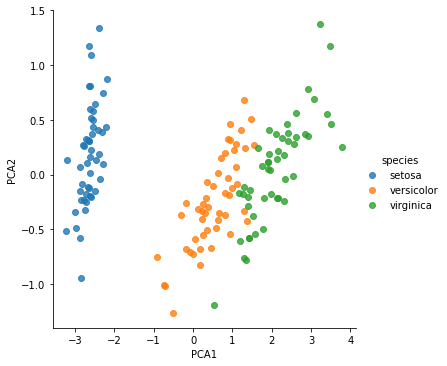

In [101]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", 
           "PCA2", 
           hue = 'species', 
           data = iris, 
           fit_reg = False
          );

####  <span style = "color:red">Código Original.</span>
<!---
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", 
           "PCA2", 
           hue = 'species', 
           data = iris, 
           fit_reg = False
          );
-->

#### Vemos que, na representação em duas dimensões, as espécies estão relativamente bem separadas, ainda que o algoritmo PCA não tivesse conhecimento das tags das espécies de flores! 

#### Isso indica que uma classificação relativamente simples deveria funcionar com esse conjunto de dados, como vimos antes. 

### Aprendizagem não supervisionada: Clustering com Iris

#### Vamos aplicar um algoritmo de clustering ao conjunto de dados Iris.

#### Um algoritmo de clustering tenta encontrar grupos diferentes sem fazer referência a tags nos dados. 

#### Vamos usar um método avançado de clustering chamado [Gaussian Mixture Model](https://scikit-learn.org/stable/modules/mixture.html#:~:text=sklearn.,of%20components%20are%20also%20provided.) (GMM). O GMM tenta modelar os dados como uma coleção de blobs Gaussianos. 

#### Podemos ajustar o [GMM](https://towardsdatascience.com/gaussian-mixture-models-explained-6986aaf5a95) da seguinte forma:

- 1. Escolhemos a classe de modelo. Importe a classe de funções [`sklearn.mixture.GaussianMixture`](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).

In [102]:
from sklearn.mixture import GaussianMixture

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.mixture import GaussianMixture
-->

- 2. Instanciamos o modelo com hiperparâmetros usando a função [`GaussianMixture()`](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html), observando os parâmetros `n_components = 3` e `covariance_type = 'full'`.

In [103]:
model = GaussianMixture(n_components = 3, covariance_type = 'full')

####  <span style = "color:red">Código Original.</span>
<!---
model = GaussianMixture(n_components = 3, covariance_type = 'full')
-->

- 3. Ajustamos aos dados. Para isso aplicamos novamente a função [`.fit()`](https://scikit-learn.org/stable/tutorial/basic/tutorial.html) ao objeto que instancia o modelo ao conjunto de teste.

In [104]:
X_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [105]:
model.fit(X_iris)

GaussianMixture(n_components=3)

####  <span style = "color:red">Código Original.</span>
<!---
model.fit(X_iris)
-->

- 4. Definimos as tags dos clusters de saída. Aqui podemos usar a função [`.predict()`](https://scipy-lectures.org/packages/scikit-learn/index.html#:~:text=predict()%20%3A%20given%20a%20trained,each%20object%20in%20the%20array.).

In [106]:
y_gmm = model.predict(X_iris)
y_gmm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

####  <span style = "color:red">Código Original.</span>
<!---
y_gmm = model.predict(X_iris)
y_gmm
-->

#### Como antes, vamos adicionar as tags dos clusters ao `DataFrame` Iris e usar `Seaborn` para traçar os resultados:

In [107]:
iris['cluster'] = y_gmm
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,cluster
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,0
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,0
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,0
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,0
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,0


####  <span style = "color:red">Código Original.</span>
<!---
iris['cluster'] = y_gmm
iris.head()
-->

#### Agora, vamos traçar os resultados. Uma forma rápida de fazer isso é inserir os resultados no `DataFrame` original de Iris e usar o método [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) de Seaborn para mostrar os resultados. Vamos novamente plotar os resultados da aproximação [Principal Component Analysis](https://medium.com/@aptrishu/understanding-principle-component-analysis-e32be0253ef0), mas agora adotando o paâmetro `col = 'cluster'`. 

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


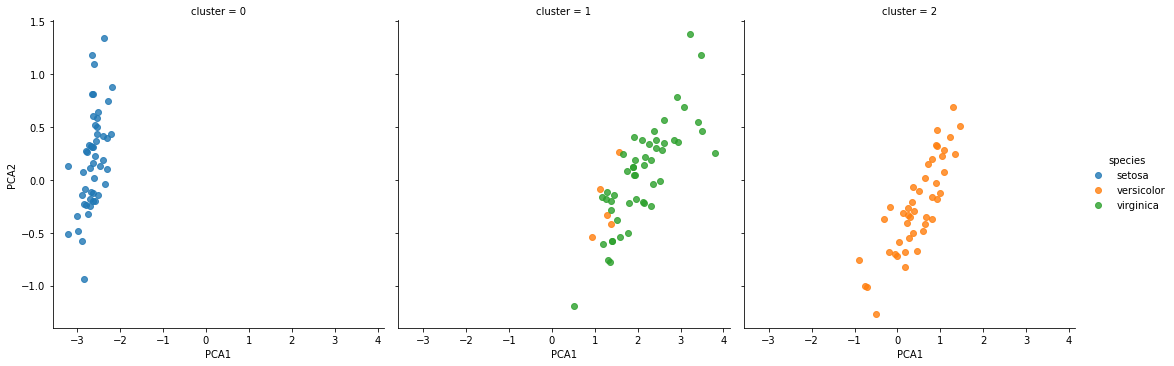

In [108]:
sns.lmplot("PCA1", 
           "PCA2", 
           data = iris, 
           hue = 'species', 
           col = 'cluster', 
           fit_reg = False
          );

In [109]:
iris["PCA1"]

0     -2.684126
1     -2.714142
2     -2.888991
3     -2.745343
4     -2.728717
         ...   
145    1.944110
146    1.527167
147    1.764346
148    1.900942
149    1.390189
Name: PCA1, Length: 150, dtype: float64

####  <span style = "color:red">Código Original.</span>
<!---
sns.lmplot("PCA1", 
           "PCA2", 
           data = iris, 
           hue = 'species', 
           col = 'cluster', 
           fit_reg = False
          );
-->

#### Depois de separar os dados por número de cluster, vemos exatamente o grau de eficiência com que o algoritmo GMM recuperou a tag subjacente: a espécie *setosa* é separada perfeitamente dentro do cluster 0, embora apareça uma pequena parte misturada entre *versicolor* e *virginica*. 

#### Isso significa que mesmo sem um especialista que nos diga as tags de cada flor, as medidas dessas observações são suficientemente diferentes para que seja possível identificar *automaticamente* a presença desses diferentes grupos de espécies com um simples algoritmo de clustering. 

## Resumindo

#### Nesta seção, abordamos as características essenciais da representação de dados em Scikit-Learn e a API de estimadores. 

#### Sem importar o tipo de estimador, o mesmo padrão de importar/instanciar/ajustar/prever se mantém em todos os casos. 

#### Com essas novas informações sobre a API de estimadores, você pode explorar a documentação de Scikit-Learn e começar a testar vários modelos sobre os dados. 

####  <span style = "color:blue">Código Original.</span>
<!---
[``]()
-->
